In [1]:
from sparse_tools_F17 import *
from survey_params import *

model = 'Be13'

sphx_par = spherex_param()
dth = sphx_par.dth
nu_binedges = sphx_par.nu_binedges
nu_bins = sphx_par.nu_bins
line_use = ['Ha', 'OIII', 'Hb', 'OII', 'Lya']
line_name_arr = [r'$H\alpha$', r'$[O\, III]$', r'$H\beta$', r'$[O\, II]$', r'$Ly\alpha$']
nu0_arr = [spec_lines.Ha.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OIII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Hb.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Lya.to(u.GHz, equivalencies=u.spectral()).value]
line_targ_vec = line_use

In [2]:
# skip this cell, load the pickle
A, I_norm, z_coords, N_nu, N_z, z_coords_all, z_idx, I_coords_all \
= sparse_dict(dth, nu_binedges, line_use, model = model)

In [4]:
# skip this cell, load the pickle
with open('data_internal/sparse_be13_dict.pickle','wb') as pfile:
    pickle.dump([A, I_norm, z_coords, N_nu, N_z, z_coords_all, z_idx, I_coords_all],pfile)

In [2]:
with open('data_internal/sparse_be13_dict.pickle','rb') as pfile:
    A, I_norm, z_coords, N_nu, N_z, z_coords_all, z_idx, I_coords_all = pickle.load(pfile)

In [3]:
# print out the z range (zmin, zmax, zmean) of broad bands of each line
for i,line in enumerate(line_use):
    lambda0 = (np.array(nu0_arr[i]) * u.GHz).to(u.um, equivalencies = u.spectral()).value
    zmin = np.array(sphx_par.band_wlmin) / lambda0 - 1
    zmax = np.array(sphx_par.band_wlmax) / lambda0 - 1
    print(line)
    print(zmin)
    print(zmax)
    print((zmin + zmax)/2)

Ha
[0.14277007 0.69129971 1.49885723 2.68733811 4.82050891 5.73472497]
[0.69129971 1.49885723 2.68733811 4.82050891 5.73472497 6.61846716]
[0.41703489 1.09507847 2.09309767 3.75392351 5.27761694 6.17659607]
OIII
[0.49790294 1.21689635 2.27541442 3.83323347 6.62931895 7.8276413 ]
[1.21689635 2.27541442 3.83323347 6.62931895 7.8276413  8.98601957]
[0.85739964 1.74615538 3.05432395 5.23127621 7.22848013 8.40683044]
Hb
[0.54289241 1.28348077 2.3737914  3.97839951 6.85846534 8.09277926]
[1.28348077 2.3737914  3.97839951 6.85846534 8.09277926 9.28594939]
[0.91318659 1.82863608 3.17609545 5.41843242 7.4756223  8.68936433]
OII
[ 1.01234237  1.9782667   3.40032197  5.49315804  9.24953045 10.85940435]
[ 1.9782667   3.40032197  5.49315804  9.24953045 10.85940435 12.41561578]
[ 1.49530453  2.68929434  4.44674001  7.37134424 10.0544674  11.63751006]
Lya
[ 5.16928519  8.13054207 12.49017027 18.90622687 30.42222588 35.35765403]
[ 8.13054207 12.49017027 18.90622687 30.42222588 35.35765403 40.1285679 ]

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


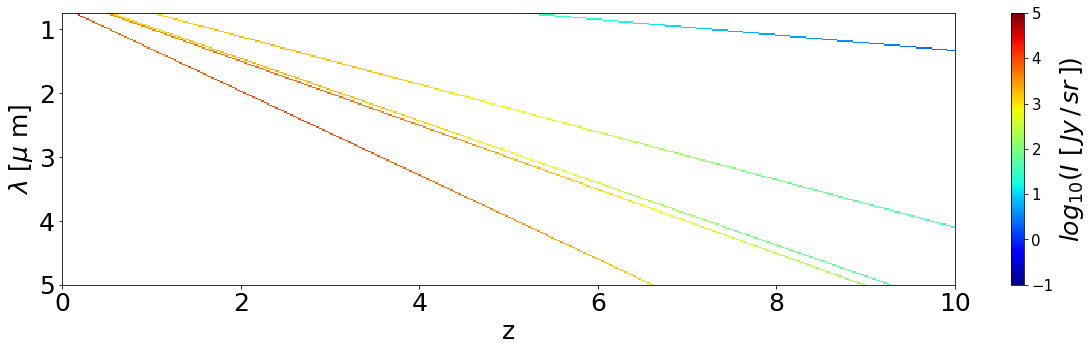

In [43]:
# skip this cell
wlbins = np.linspace(sphx_par.wl_binedges[0],sphx_par.wl_binedges[-1],200)
wlbins = (wlbins * u.um).to(u.GHz, equivalencies = u.spectral()).value
_, _, _, _, _, _, _, I_coords_all1 = sparse_dict(dth, wlbins,\
                                      line_use, model = model, dz = 0.001)

fig = plt.figure(figsize=(20,5))
ext = [z_coords_all[0], z_coords_all[-1], sphx_par.wl_binedges[-1], sphx_par.wl_binedges[0]]
plt.imshow(np.log10(I_coords_all1), aspect='auto', extent = ext, vmin = -1, vmax = 5, cmap = "jet")
cbar = plt.colorbar()
cbar.set_label(r'$log_{10}(I\,\,[\,Jy\, /\, sr\,])$', fontsize = 25)
cbar.ax.tick_params(labelsize=15) 
plt.xlabel('z',fontsize=25)
plt.ylabel(r'$\lambda$ [$\mu$ m]',fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.savefig('plots/paperfig/A_raw.pdf', bbox_inches = 'tight', dpi = 300)

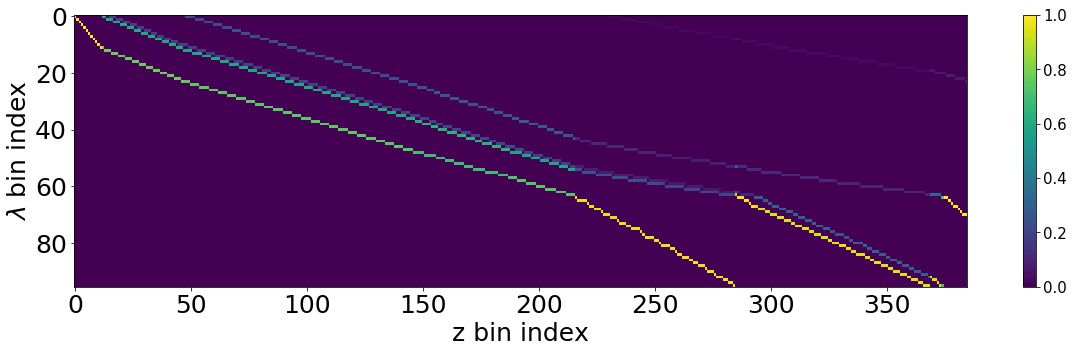

In [4]:
#
fig = plt.figure(figsize=(20,5))
plt.imshow(A, aspect='auto', vmin = 0, vmax = 1)
plt.xlabel('z bin index',fontsize=25)
plt.ylabel(r'$\lambda$ bin index',fontsize = 25)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15) 
plt.tick_params(axis='both', which='major', labelsize=25)

plt.savefig('plots/paperfig/A.pdf', bbox_inches = 'tight', dpi = 300)

# Plot an Example Light Cone

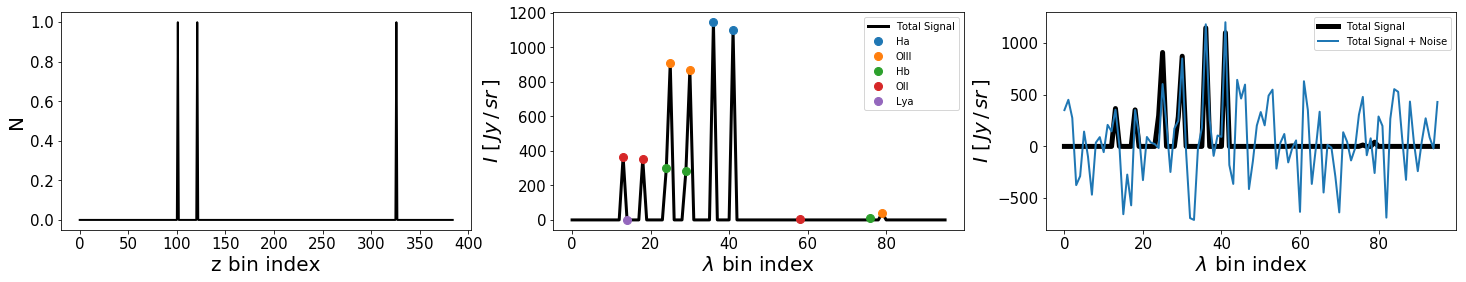

In [158]:
# Toy
dOm = (dth * u.arcmin.to(u.rad))**2
sigI0 = 3631 * 10**(-22  /2.5) / 5 / dOm / np.sqrt(4) # pixel NEI

N_true, Itrue_all, Itrue_targ = gen_lightcone_toy(4, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI0, Itrue_all.shape)
N_true = np.sum(N_true, axis = 0)
Itrue_all = np.mean(Itrue_all, axis = 0)
Iobs_all = np.mean(Iobs_all, axis = 0)
Itrue_targ = np.mean(Itrue_targ, axis = 1)
fig, ax = plt.subplots(1,3, figsize = (25,4))

ax[0].plot(N_true, 'k', lw = 2)
ax[0].set_xlabel('z bin index', fontsize = 20)
ax[0].set_ylabel('N', fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize=15)

ax[1].plot(Itrue_all, 'k-', lw = 3, label = 'Total Signal')
for i in range(len(line_use)):
    sp = np.where(Itrue_targ[i,:] != 0)[0]
    ax[1].plot(np.arange(N_nu)[sp],Itrue_targ[i,sp], 'o',label = line_name_arr[i], markersize = 8)
ax[1].legend(loc = 0)
ax[1].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize=15)


ax[2].plot(Itrue_all,'k-', lw = 5, label = 'Total Signal')
ax[2].plot(Iobs_all,'-', lw = 2, label = 'Total Signal + Noise')
ax[2].legend(loc = 0)
ax[2].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[2].tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.savefig('plots/paperfig/toy_lc.pdf', bbox_inches = 'tight', dpi = 300)

[1.799  2.161  7.7975]


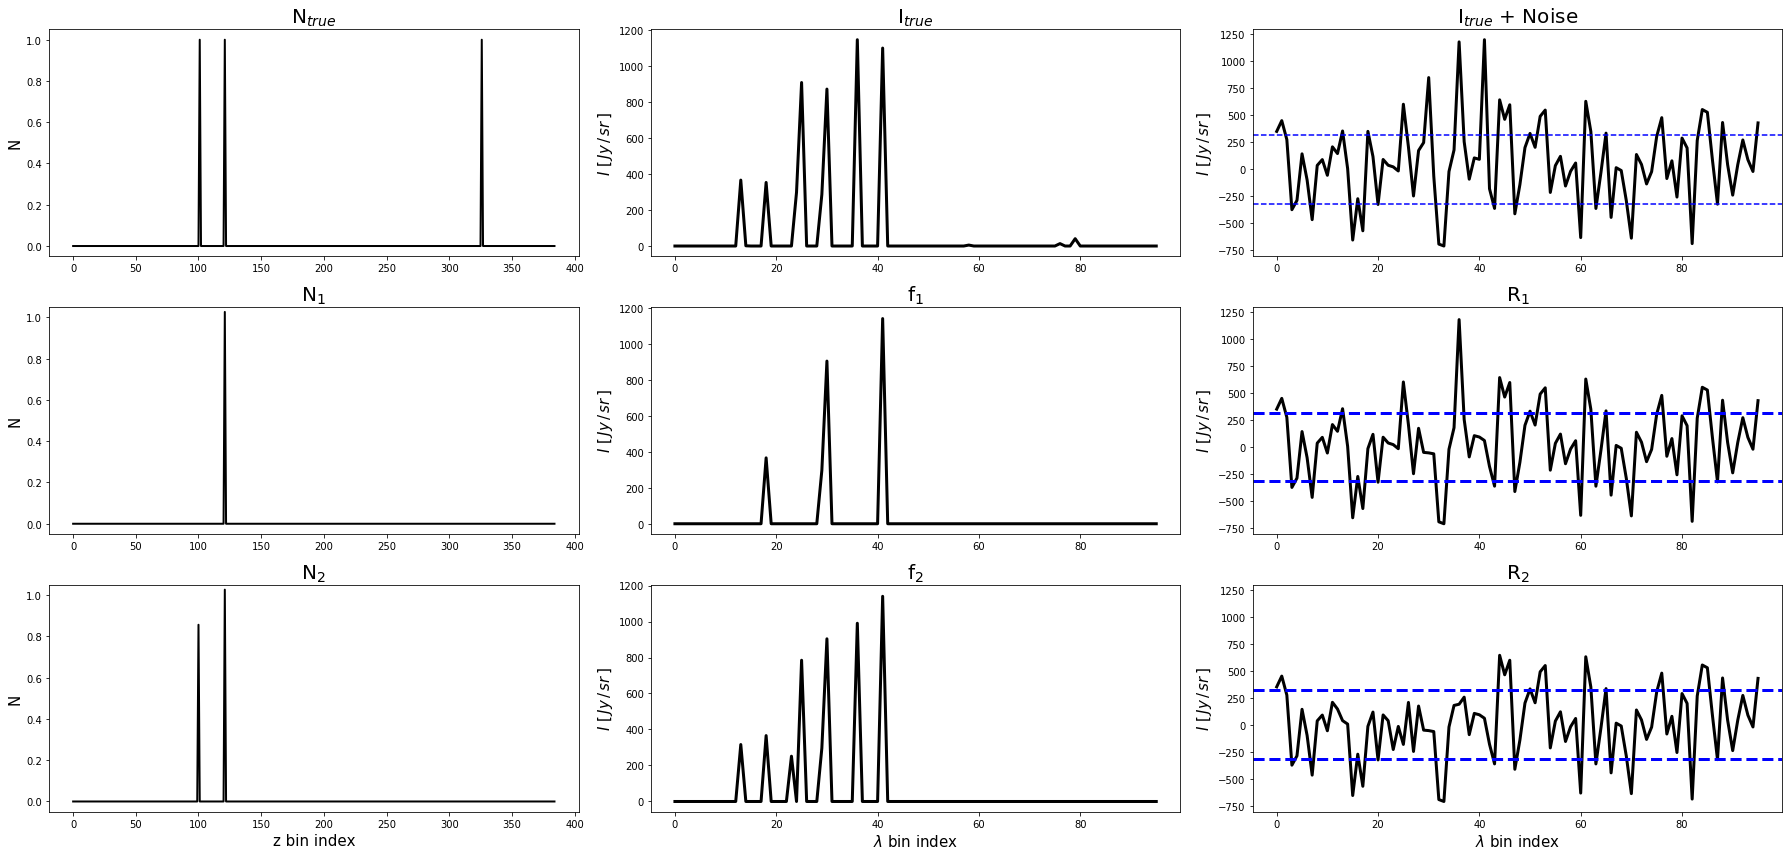

In [193]:
# MP step-by-step (toy)
sigI = sigI0 / np.sqrt(4)
e_th = sigI
iter_max = 10
R_arr = Iobs_all.copy()
R = np.sqrt(np.mean(R_arr**2))
f_arr = np.zeros(N_nu)
NI_arr = np.zeros(N_z)
iter_count = 0

fig, ax = plt.subplots(3,3, figsize = (25, 12))
ax[0][0].plot(N_true, 'k', lw = 2)
ax[0][0].set_ylabel('N', fontsize = 15)
ax[0][0].tick_params(axis='both', which='major', labelsize=10)
ax[0][0].set_title('N$_{true}$', fontsize = 20)

ax[0][1].plot(Itrue_all, 'k-', lw = 3, label = 'Total Signal')
ax[0][1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 15)
ax[0][1].tick_params(axis='both', which='major', labelsize=10)
ax[0][1].set_title('I$_{true}$', fontsize = 20)

ax[0][2].plot(Iobs_all,'k-', lw = 3, label = 'Total Signal + Noise')
line = ax[0][2].axhline(sigI, ls = '--', c = 'b')
ax[0][2].axhline(-sigI, ls = '--', c = line.get_color())
ax[0][2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 15)
ax[0][2].tick_params(axis='both', which='major', labelsize=10)
ax[0][2].set_title('I$_{true}$ + Noise', fontsize = 20)

while True:
    if (R < e_th) or iter_count == iter_max:
        break
    iter_count += 1
    gamma = np.argmax(np.dot(R_arr.reshape(1,-1), A)[0])
    amp = np.sum(A[:,gamma] * R_arr)
    u_arr = amp * A[:,gamma]
    NI_arr[gamma] += amp
    R_arr -= u_arr
    f_arr += u_arr
    R = np.sqrt(np.mean(R_arr**2))
    
    
    ax[iter_count][0].plot(NI_arr / (I_norm / 4), 'k', lw = 2)
    ax[iter_count][0].set_ylim(ax[0][0].get_ylim())
    ax[iter_count][0].set_ylabel('N', fontsize = 15)
    ax[iter_count][0].tick_params(axis='both', which='major', labelsize=10)
    ax[iter_count][0].set_title('N$_{%d}$'%iter_count, fontsize = 20)
    
    ax[iter_count][1].plot(f_arr, 'k-', lw = 3, label = 'Total Signal')
    ax[iter_count][1].set_ylim(ax[0][1].get_ylim())
    ax[iter_count][1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 15)
    ax[iter_count][1].tick_params(axis='both', which='major', labelsize=10)
    ax[iter_count][1].set_title('f$_{%d}$'%iter_count, fontsize = 20)

    ax[iter_count][2].plot(R_arr,'k-', lw = 3, label = 'Total Signal + Noise')
    ax[iter_count][2].set_ylim(ax[0][2].get_ylim())
    ax[iter_count][2].axhline(sigI, ls = '--', c = line.get_color(), lw = 3)
    ax[iter_count][2].axhline(-sigI, ls = '--', c = line.get_color(), lw = 3)
    ax[iter_count][2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 15)
    ax[iter_count][2].tick_params(axis='both', which='major', labelsize=10)
    ax[iter_count][2].set_title('R$_{%d}$'%iter_count, fontsize = 20)

ax[2][0].set_xlabel('z bin index', fontsize = 15)
ax[2][1].set_xlabel('$\lambda$ bin index', fontsize = 15)
ax[2][2].set_xlabel('$\lambda$ bin index', fontsize = 15)

fig.tight_layout()
plt.savefig('plots/paperfig/MP_steps.pdf', bbox_inches = 'tight', dpi = 300)

print(z_coords[N_true > 0])

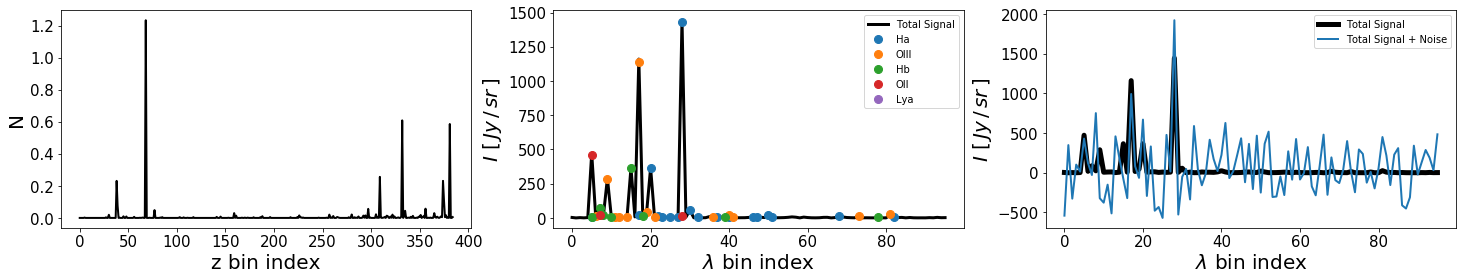

In [134]:
# Full
dOm = (dth * u.arcmin.to(u.rad))**2
sigI0 = 3631 * 10**(-22  /2.5) / 5 / dOm / np.sqrt(4) # pixel NEI

N_true, Itrue_all, Itrue_targ = gen_lightcone(4, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI0, Itrue_all.shape)
N_true = np.sum(N_true, axis = 0)
Itrue_all = np.mean(Itrue_all, axis = 0)
Iobs_all = np.mean(Iobs_all, axis = 0)
Itrue_targ = np.mean(Itrue_targ, axis = 1)
fig, ax = plt.subplots(1,3, figsize = (25,4))

ax[0].plot(N_true, 'k', lw = 2)
ax[0].set_xlabel('z bin index', fontsize = 20)
ax[0].set_ylabel('N', fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize=15)

ax[1].plot(Itrue_all, 'k-', lw = 3, label = 'Total Signal')
for i in range(len(line_use)):
    sp = np.where(Itrue_targ[i,:] > 5)[0]
    ax[1].plot(np.arange(N_nu)[sp],Itrue_targ[i,sp], 'o',label = line_name_arr[i], markersize = 8)
ax[1].legend(loc = 0)
ax[1].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize=15)


ax[2].plot(Itrue_all,'k-', lw = 5, label = 'Total Signal')
ax[2].plot(Iobs_all,'-', lw = 2, label = 'Total Signal + Noise')
ax[2].legend(loc = 0)
ax[2].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[2].tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.savefig('plots/paperfig/full_lc.pdf', bbox_inches = 'tight', dpi = 300)

# Trial Run

In [42]:
#
N_lc = 1
line_targ_vec = line_use
sigI = 600
C = 0

N_true, Itrue_all, Itrue_targ \
   = gen_lightcone_toy(N_lc, dth, nu_binedges, z_coords_all, I_coords_all,\
                       z_idx, line_use, line_targ_vec, model = model)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape) + C

alpha = 1
N_pred_l1 = run_lasso(A, I_norm, Iobs_all, alpha)
_, Ipred_targ = gen_Ipred\
    (z_coords, N_pred_l1, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

alpha = 1
sig_cut = 1.
Iobs_all_dn = Iobs_all.copy()
Iobs_all_dn[Iobs_all_dn < sig_cut * sigI] = 0
N_pred_dn = run_lasso(A, I_norm, Iobs_all_dn, alpha)
_, Ipred_targ_dn = gen_Ipred\
    (z_coords, N_pred_dn, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

e_th = sigI
N_pred_mp = run_MP(A, I_norm, Iobs_all, e_th)
_, Ipred_targ_mp = gen_Ipred\
    (z_coords, N_pred_mp, dth, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)

Text(0,0.5,'I [Jy/sr]')

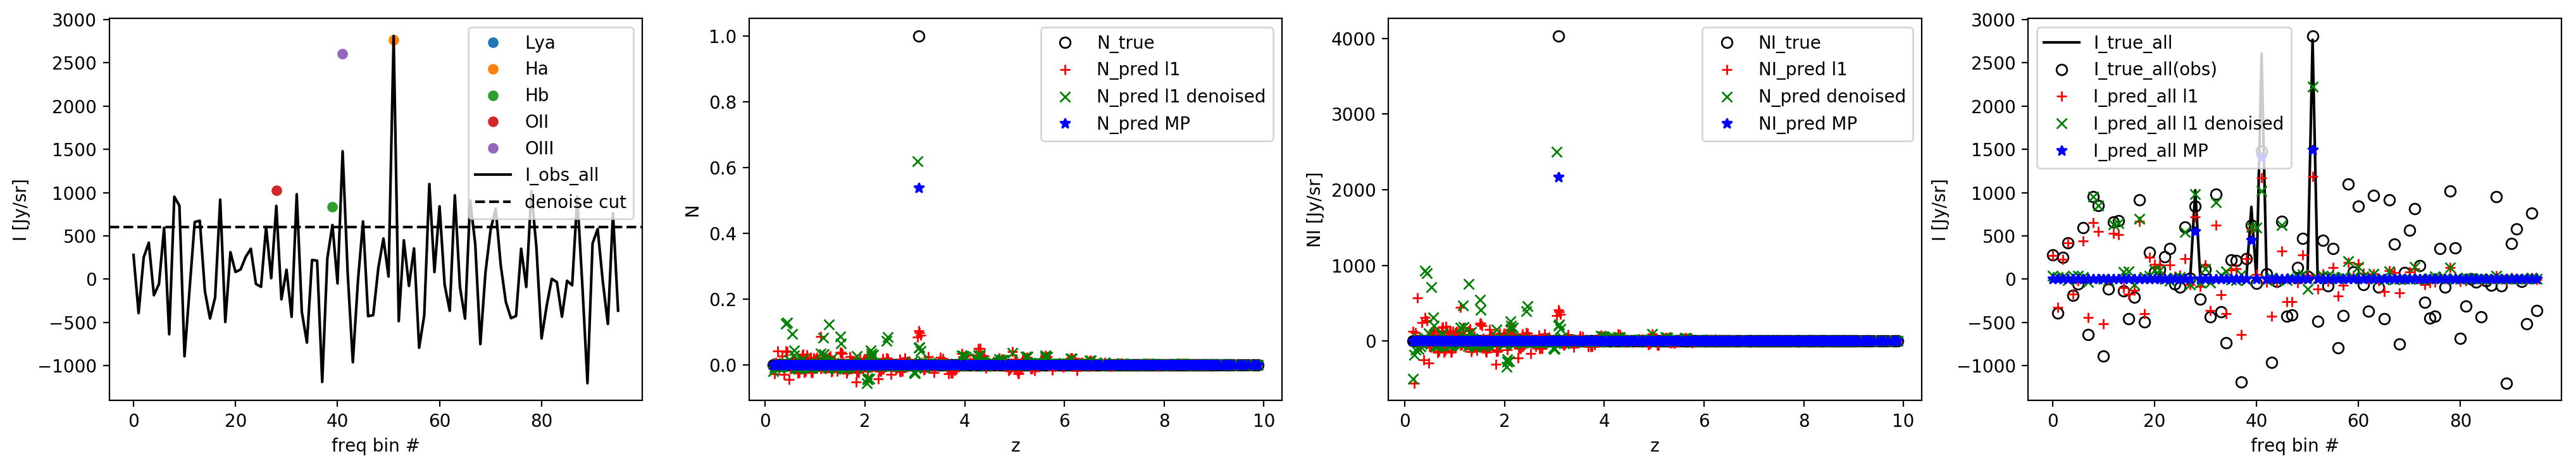

In [43]:
#
fig, ax = plt.subplots(1,4,figsize = (25,4), dpi = 200)
for j in range(len(line_targ_vec)):
    sp = np.where(Itrue_targ[j,0,:] != 0)[0]
    ax[0].plot(np.arange(N_nu)[sp],Itrue_targ[j,0,:][sp],'o', \
               label = line_targ_vec[j], markersize = 5)
ax[0].plot(Iobs_all[0,:],'k', label = 'I_obs_all')
ax[0].axhline(sig_cut * sigI, c = 'k', ls = '--', label = 'denoise cut')
ax[0].legend(loc = 0)
ax[0].set_xlabel('freq bin #')
ax[0].set_ylabel('I [Jy/sr]')

ax[1].plot(z_coords, N_true[0,:], 'ko', markerfacecolor='None', label='N_true')
ax[1].plot(z_coords, N_pred_l1[0],'r+',label='N_pred l1')
ax[1].plot(z_coords, N_pred_dn[0],'gx',label='N_pred l1 denoised')
ax[1].plot(z_coords, N_pred_mp[0],'b*',label='N_pred MP')
ax[1].legend(loc = 0)
ax[1].set_xlabel('z')
ax[1].set_ylabel('N')

ax[2].plot(z_coords, N_true[0,:]*I_norm,' ko', markerfacecolor='None', label='NI_true')
ax[2].plot(z_coords, N_pred_l1[0]*I_norm,'r+',label='NI_pred l1')
ax[2].plot(z_coords, N_pred_dn[0]*I_norm,'gx',label='N_pred denoised')
ax[2].plot(z_coords, N_pred_mp[0]*I_norm,'b*',label='NI_pred MP')
ax[2].legend(loc = 0)
ax[2].set_xlabel('z')
ax[2].set_ylabel('NI [Jy/sr]')

ax[3].plot(Itrue_all[0,:],'k-', markerfacecolor='None',label='I_true_all')
ax[3].plot(Iobs_all[0,:],'ko', markerfacecolor='None',label='I_true_all(obs)')
ax[3].plot(((N_pred_l1[0,:] * I_norm).reshape(-1,N_pred_l1.shape[1]) @ A.T).flatten(),\
           'r+',label='I_pred_all l1')
ax[3].plot(((N_pred_dn[0,:] * I_norm).reshape(-1,N_pred_dn.shape[1]) @ A.T).flatten(),\
           'gx',label='I_pred_all l1 denoised')
ax[3].plot(((N_pred_mp[0,:] * I_norm).reshape(-1,N_pred_mp.shape[1]) @ A.T).flatten(),\
           'b*',label='I_pred_all MP')
ax[3].legend(loc = 0)
ax[3].set_xlabel('freq bin #')
ax[3].set_ylabel('I [Jy/sr]')

# fig, ax = plt.subplots(1,5,figsize = (25,4))
# for j in range(len(line_targ_vec)):
#     ax[j].plot(Itrue_all[0,:],'k-', label='I_true_all')
#     ax[j].plot(Itrue_targ[j,0,:],'bo', markerfacecolor='None', markersize = 5, \
#                   label='I_true_' + line_targ_vec[j])
#     ax[j].plot(Ipred_targ[j,0,:],'r+', label='I_pred_' + line_targ_vec[j])
#     ax[j].plot(Ipred_targ_dn[j,0,:],'gx', label='I_pred_' + line_targ_vec[j] + '\n denoised')
#     ax[j].legend(loc = 0)
#     ax[j].set_title(line_targ_vec[j])
#     ax[j].set_xlabel('freq bin #')
#     ax[j].set_ylabel('I [Jy/sr]')

# Toy Model (Binning 4 Pixels)

In [6]:
N_lc = 2500
line_targ_vec = line_use
dOm = (dth * u.arcmin.to(u.rad))**2

In [7]:
# skip this cell, load the pickle
N_true0, Itrue_all0, Itrue_targ0 = gen_lightcone_toy(N_lc*4, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
N_true = N_true0[::4,:] + N_true0[1::4,:] + N_true0[2::4,:] + N_true0[3::4,:]
Itrue_all = (Itrue_all0[::4,:] + Itrue_all0[1::4,:] + Itrue_all0[2::4,:] + Itrue_all0[3::4,:]) / 4
Itrue_targ = (Itrue_targ0[:,::4,:] + Itrue_targ0[:,1::4,:] + Itrue_targ0[:,2::4,:] + Itrue_targ0[:,3::4,:]) / 4

In [9]:
# skip this cell, load the pickle
with open('data_internal/sparse_be13_toy.pickle','wb') as pfile:
    pickle.dump([N_true, Itrue_all, Itrue_targ], pfile)

In [8]:
with open('data_internal/sparse_be13_toy.pickle','rb') as pfile:
    N_true, Itrue_all, Itrue_targ = pickle.load(pfile)

In [ ]:
sigI0 = 3631 * 10**(-22 / 2.5) / 5 / dOm / np.sqrt(4) # pixel NEI
sigI = sigI0 / np.sqrt(4)
e_th = sigI

N_sim = 100
Ipred_targ_arr = np.zeros([N_sim]+list(Itrue_targ.shape))
for i in range(N_sim):
    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    N_pred = run_MP(A, I_norm / 4, Iobs_all, e_th)
    _, Ipred_targ = gen_Ipred\
        (z_coords, N_pred, dth*2, nu_binedges, line_use, line_targ_vec, model = model, verbose = 0)
    Ipred_targ_arr[i] = Ipred_targ

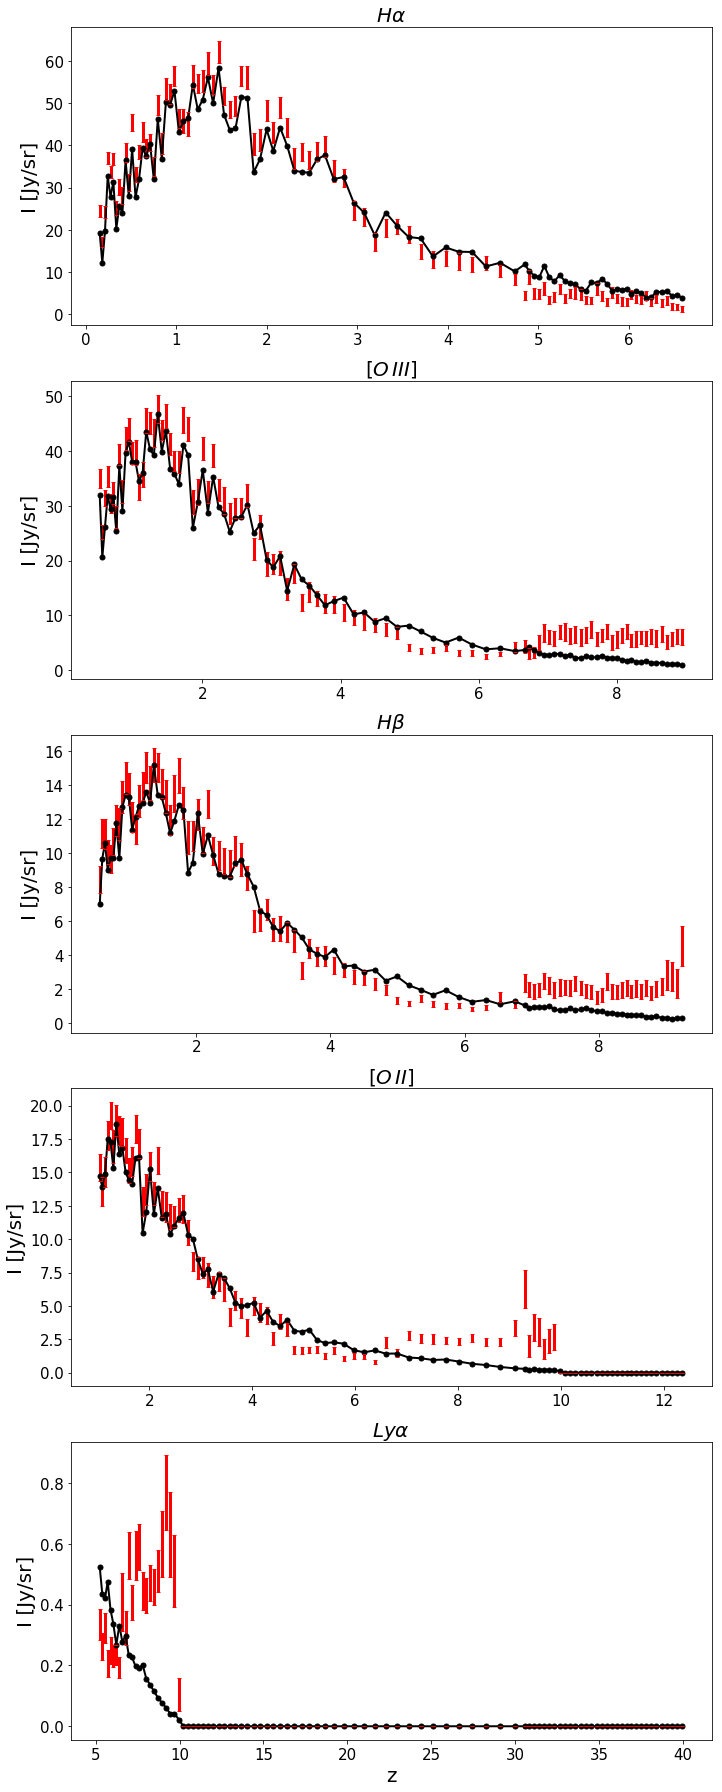

In [463]:
# toy

nu0_arr = [spec_lines.Ha.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OIII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Hb.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Lya.to(u.GHz, equivalencies=u.spectral()).value]

fig, ax = plt.subplots(5, 1, figsize = (10,25))

for jtarg, (nu0, line_name) in enumerate(zip(nu0_arr, line_name_arr)):
    zbins = nu0 / sphx_par.nu_bins - 1
    mu_true = np.mean(Itrue_targ[jtarg,:,:], axis=0)
    ax[jtarg].plot(zbins, mu_true, 'ko-', markersize = 5, lw = 2)
    
    mus_pred = np.mean(Ipred_targ_arr[:,jtarg,:,:], axis = 1)
    mu_pred = np.mean(mus_pred, axis = 0)
    sig = np.std(mus_pred, axis = 0)
    ax[jtarg].errorbar(zbins, mu_pred, sig, c = 'r', fmt = 'none', capsize = 2, lw = 3)
    ax[jtarg].set_title(line_name, fontsize = 20)
    ax[jtarg].tick_params(axis='both', which='major', labelsize=15)
    ax[jtarg].set_ylabel('I [Jy/sr]', fontsize = 20)
ax[4].set_xlabel('z', fontsize = 20)
fig.tight_layout()
plt.savefig('plots/paperfig/Toy_I.pdf', bbox_inches = 'tight', dpi = 300)

Ha, z = 0.40, Itrue = 28.308, Ipred = 32.866 +- 0.413, err = 16.10% 
Ha, z = 1.07, Itrue = 47.619, Ipred = 50.451 +- 0.587, err = 5.95% 
Ha, z = 2.05, Itrue = 40.651, Ipred = 44.905 +- 0.562, err = 10.46% 
Ha, z = 3.67, Itrue = 19.246, Ipred = 17.955 +- 0.496, err = -6.71% 
Ha, z = 5.27, Itrue = 8.396, Ipred = 4.862 +- 0.293, err = -42.09% 
Ha, z = 6.17, Itrue = 5.164, Ipred = 3.200 +- 0.273, err = -38.03% 
OIII, z = 0.83, Itrue = 33.422, Ipred = 35.623 +- 0.447, err = 6.58% 
OIII, z = 1.71, Itrue = 36.485, Ipred = 40.131 +- 0.456, err = 9.99% 
OIII, z = 3.00, Itrue = 21.404, Ipred = 21.350 +- 0.439, err = -0.25% 
OIII, z = 5.12, Itrue = 7.544, Ipred = 5.896 +- 0.239, err = -21.84% 
OIII, z = 7.21, Itrue = 2.855, Ipred = 5.801 +- 0.377, err = 103.23% 
OIII, z = 8.39, Itrue = 1.564, Ipred = 5.970 +- 0.365, err = 281.65% 
Hb, z = 0.89, Itrue = 11.211, Ipred = 11.993 +- 0.149, err = 6.97% 
Hb, z = 1.79, Itrue = 11.617, Ipred = 12.660 +- 0.147, err = 8.98% 
Hb, z = 3.12, Itrue = 6.602, Ipr

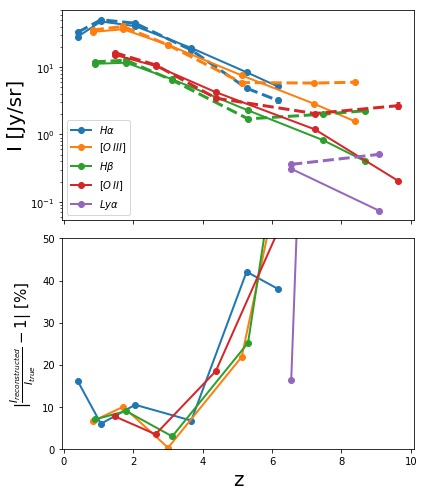

In [495]:
# toy
from matplotlib import gridspec

fig = plt.figure(figsize=[6,7])
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
ax1= plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex = ax1)

for jtarg, (nu0, line_name,i,j) in enumerate(zip(nu0_arr, line_name_arr,[0,0,0,1,1],[0,1,2,0,1])):
    zbins = nu0 / sphx_par.nu_bins - 1
    mu_true = np.mean(Itrue_targ[jtarg,:,:], axis=0)    
    mus_pred = np.mean(Ipred_targ_arr[:,jtarg,:,:], axis = 1)
    mu_pred = np.mean(mus_pred, axis = 0)
    sig = np.std(mus_pred, axis = 0)
    bz = []
    bmu_true = []
    bmu_pred = []
    bsig_pred = []
    for iband in range(6):
        band_zbins = zbins[16*iband:16*(iband+1)]
        band_mu_true = mu_true[16*iband:16*(iband+1)]
        band_mus_pred = mus_pred[:,16*iband:16*(iband+1)]
        sp = np.where(band_zbins < 10)[0]
        band_zbins = band_zbins[sp]
        band_mu_true = band_mu_true[sp]
        band_mus_pred = band_mus_pred[:,sp]
        if len(sp) != 0:
            bz.append(np.mean(band_zbins))
            bmu_true.append(np.mean(band_mu_true))
            band_mus_pred = np.mean(band_mus_pred, axis = 1)
            bmu_pred.append(np.mean(band_mus_pred))
            bsig_pred.append(np.std(band_mus_pred))
            err = (np.mean(band_mus_pred) - np.mean(band_mu_true)) / np.mean(band_mu_true)
            print('%s, z = %.2f, Itrue = %.3f, Ipred = %.3f +- %.3f, err = %.2f%% '\
                  %(line_use[jtarg],np.mean(band_zbins),np.mean(band_mu_true),\
                    np.mean(band_mus_pred),np.std(band_mus_pred), err*100))
    line = ax1.plot(bz, bmu_true,'o-', lw = 2, label = line_name)
    ax1.errorbar(bz, bmu_pred, bsig_pred, c = line[0].get_color(), fmt = 'none', capsize = 2, lw = 3)
    ax1.plot(bz, bmu_pred, 'o--', c = line[0].get_color(), lw = 3)
    err_arr = (np.array(bmu_pred) - np.array(bmu_true)) / np.array(bmu_true)
    ax2.plot(bz, np.abs(err_arr) * 100, 'o-', lw = 2, label = line_name)
    
ax1.set_ylabel('I [Jy/sr]', fontsize = 20)
ax1.tick_params(axis='both', which='major', labelsize=10)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_yscale('log')
ax1.legend(loc = 0, fontsize = 10)
ax2.set_xlabel('z', fontsize = 20)
ax2.set_ylabel(r'$|\frac{I_{reconstructed}}{I_{true}} - 1|$ [%]', fontsize = 15)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_ylim([0,50])

plt.subplots_adjust(hspace=.0)
fig.tight_layout()
plt.savefig('plots/paperfig/Toy_I_band.pdf', bbox_inches = 'tight', dpi = 300)

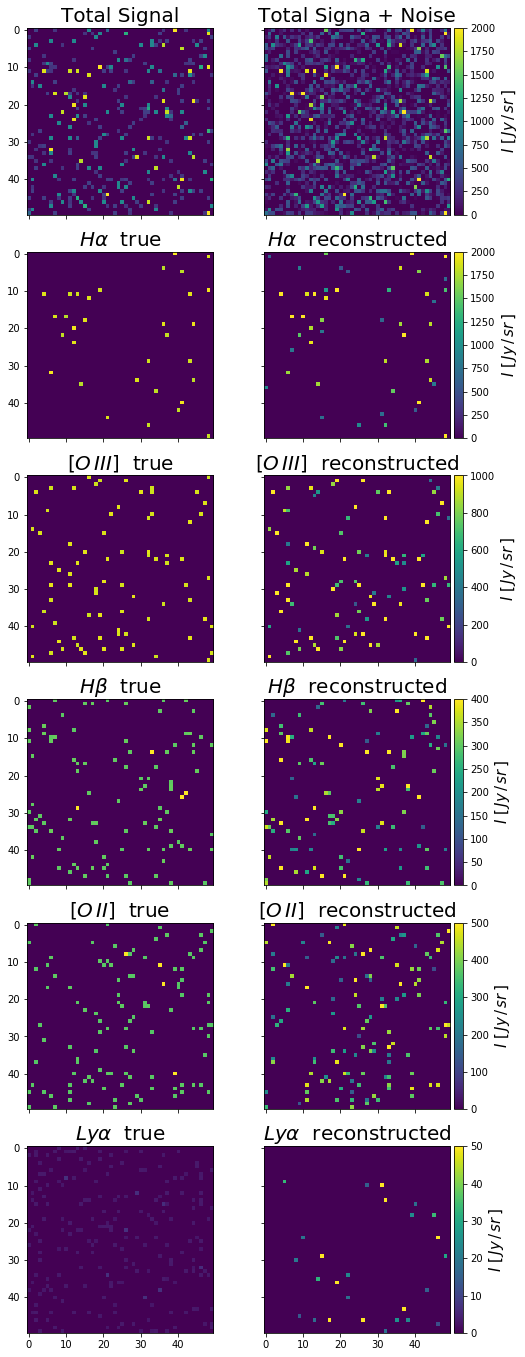

In [493]:
#
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(6,2, figsize = (8,24))
img1 = ax[0][0].imshow(Itrue_all[:,8].reshape(50,50), vmin = 0, vmax = 2000)
img2 = ax[0][1].imshow(Iobs_all[:,8].reshape(50,50), vmin = 0, vmax = 2000)
divider = make_axes_locatable(ax[0][1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img2, cax=cax2)
cbar.set_label(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 15)
ax[0][0].set_title('Total Signal', fontsize = 20)
ax[0][1].set_title('Total Signa + Noise', fontsize = 20)
ax[0][1].get_yaxis().set_ticklabels([])
ax[0][0].get_xaxis().set_ticklabels([])
ax[0][1].get_xaxis().set_ticklabels([])
        
for i,vmax in enumerate([2000,1000,400,500,50]):
    img1 = ax[i+1][0].imshow(Itrue_targ[i,:,8].reshape(50,50), vmin = 0, vmax = vmax)
    img2 = ax[i+1][1].imshow(Ipred_targ_arr[-1,i,:,8].reshape(50,50), vmin = 0, vmax = vmax)
    divider = make_axes_locatable(ax[i+1][1])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(img2, cax=cax2)
    cbar.set_label(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 15)
    ax[i+1][0].set_title(line_name_arr[i] + '  true', fontsize = 20)
    ax[i+1][1].set_title(line_name_arr[i] + '  reconstructed', fontsize = 20)
    ax[i+1][1].get_yaxis().set_ticklabels([])
    if i != len(line_use) - 1:
        ax[i+1][0].get_xaxis().set_ticklabels([])
        ax[i+1][1].get_xaxis().set_ticklabels([])

plt.savefig('plots/paperfig/Toy_im.pdf', bbox_inches = 'tight', dpi = 300)

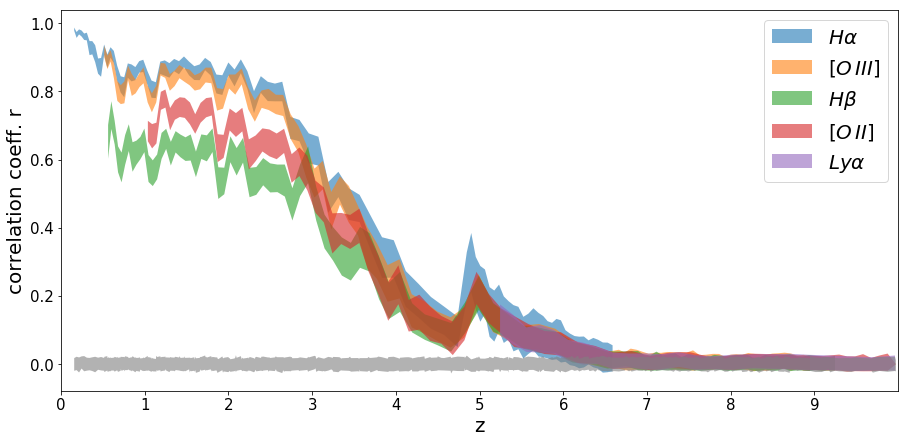

In [609]:
#
fig, ax = plt.subplots(1, 1, figsize = (15,7))

mucntot_arr = np.array([])
sigcntot_arr = np.array([])
ztot_arr = np.array([])
for jtarg in range(len(line_use)):
    nu0 = nu0_arr[jtarg]
    zbins = nu0 / sphx_par.nu_bins - 1
    sp = np.where(zbins < 10)[0]
    mucp_arr = np.zeros(N_nu)
    sigcp_arr = np.zeros(N_nu)
    mucn_arr = np.zeros(N_nu)
    sigcn_arr = np.zeros(N_nu)
    for iband in range(N_nu):
        cp_arr = np.zeros(Ipred_targ_arr.shape[0])
        cn_arr = np.zeros(Ipred_targ_arr.shape[0])
        for isim in range(Ipred_targ_arr.shape[0]):
            mapt = Itrue_targ[jtarg, :, iband]
            mapp = Ipred_targ_arr[isim, jtarg, :, iband]
            mapn = np.random.normal(size = mapt.shape)
            mapt -= np.mean(mapt)
            mapp -= np.mean(mapp)
            mapn -= np.mean(mapn)
            if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                cp_arr[isim] = np.sum(mapt * mapp) / np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
            if np.sum(mapt**2) > 0 and np.sum(mapn**2) > 0:
                cn_arr[isim] = np.sum(mapt * mapn) / np.sqrt(np.sum(mapt**2) * np.sum(mapn**2))
        mucp_arr[iband] = np.mean(cp_arr)
        sigcp_arr[iband] = np.std(cp_arr)
        mucn_arr[iband] = np.mean(cn_arr)
        sigcn_arr[iband] = np.std(cn_arr)
        
    mucntot_arr = np.concatenate((mucntot_arr, mucn_arr[sp]))
    sigcntot_arr = np.concatenate((sigcntot_arr, sigcn_arr[sp]))
    ztot_arr = np.concatenate((ztot_arr, zbins[sp]))
    ax.fill_between(zbins[sp],mucp_arr[sp] - sigcp_arr[sp], mucp_arr[sp] + sigcp_arr[sp],\
                    label = line_name_arr[jtarg], alpha = 0.6)
sortidx = ztot_arr.argsort()
ax.fill_between(ztot_arr[sortidx], mucntot_arr[sortidx] - sigcntot_arr[sortidx],\
                mucntot_arr[sortidx] + sigcntot_arr[sortidx], alpha=0.6, facecolor='gray')
ax.legend(loc = 0, fontsize = 20)
ax.set_xlabel('z', fontsize = 20)
ax.set_xlim([0,10])
ax.set_ylabel(r'correlation coeff. r', fontsize = 20)
ax.set_xticks(np.arange(10))
ax.tick_params(axis='both', which='major', labelsize=15)

plt.savefig('plots/paperfig/Toy_r.pdf', bbox_inches = 'tight', dpi = 300)